In [2]:

# RFM Customer Segmentation Analysis

#Required Libraries
# pandas
#matplotlib
#seaborn
#openpyxl


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
# Load the dataset
df= pd.read_excel("C:/Users/vinay/Downloads/Online Retail (1).xlsx")
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

In [5]:
# Basic structure
df.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
# Check for missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
# Check for canceled orders (InvoiceNo starts with 'C')
df['InvoiceNo'].astype(str).str.startswith('C').value_counts()

InvoiceNo
False    532621
True       9288
Name: count, dtype: int64

In [10]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
#Data Cleaning
#1.Remove Missing Values
df= df.dropna(subset = ['CustomerID'])

In [12]:
#2. Remove canceled orders
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]

In [13]:
#Creating a Column for Total Price
df['TotalPrice']=df['Quantity']*df['UnitPrice']
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  TotalPrice  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom       15.30  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom       22.00  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom       20.34  
...                    ...        ...         ...             ...         ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France       10.20  
541905 2011-12-09 12:50:00       2.10     12680.0          France       12.60  
541906 2011-12-09 12:50:00       4.15     12680.0          France       16.60  
541907 2011-12-09 12:50:00       4.15     12680.0          France       16.60  
541908 2011-12-09 12:50:00       4.95     12680.0          France       14.85  

[397924 rows x 9 columns]

In [14]:
#Define a snapshot date
#calculate Recency (days since last purchase)
snapshot_date = df['InvoiceDate'].max()+pd.Timedelta(days=1)
print(snapshot_date)

2011-12-10 12:50:00


In [15]:
#Group by CustomerID to calculate RFM
rfm= df.groupby('CustomerID').agg({
    'InvoiceDate':lambda x:(snapshot_date-x.max()).days, #Recency
    'InvoiceNo' : 'nunique',#Frequency
    'TotalPrice':'sum'#Monetary
})
rfm.columns = ['Recency','Frequency','Monetary']
rfm.reset_index()
rfm.head()

Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40

In [16]:
#Assign RFM Scores (1–5)
# Recency: lower is better → reverse scoring
rfm['r_score']=pd.qcut(rfm['Recency'],5,labels=[5,4,3,2,1])
#frequency: more is better 
rfm['f_score']=pd.qcut(rfm['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])
#Monetary: more is better
rfm['m_score']=pd.qcut(rfm['Monetary'],5,labels=[1,2,3,4,5])

In [17]:
rfm['CustomerID'] = rfm.index
rfm = rfm.reset_index(drop=True)
#Create an RFM Segment
rfm['RFM_Segment']=rfm['r_score'].astype(str)+rfm['f_score'].astype(str)+rfm['m_score'].astype(str)
#calculate the overall RFM score
rfm['RFM_Score']=rfm[['r_score','f_score','m_score']].astype(int).sum(axis=1)
#Preview:
rfm[['CustomerID','RFM_Segment','RFM_Score']].head()

CustomerID RFM_Segment  RFM_Score
0     12346.0         115          7
1     12347.0         555         15
2     12348.0         244         10
3     12349.0         414          9
4     12350.0         112          4

In [18]:
#Adding Segment labels
def segment_customer(row):
    if row['RFM_Segment'] == '555':
        return 'Champion'
    elif row['r_score']>=4 and row['f_score']>=4:
        return 'Loyal'
    elif row['r_score'] ==1 and row['f_score']<=2:
        return 'AtRisk'
    elif row['m_score'] == 5:
        return 'Big Spender'
    else:
        return 'Others'
rfm['Segment'] = rfm.apply(segment_customer, axis=1)
rfm[['CustomerID', 'RFM_Segment', 'RFM_Score', 'Segment']].head()
    

CustomerID RFM_Segment  RFM_Score   Segment
0     12346.0         115          7    AtRisk
1     12347.0         555         15  Champion
2     12348.0         244         10    Others
3     12349.0         414          9    Others
4     12350.0         112          4    AtRisk

In [19]:
rfm.columns


Index(['Recency', 'Frequency', 'Monetary', 'r_score', 'f_score', 'm_score',
       'CustomerID', 'RFM_Segment', 'RFM_Score', 'Segment'],
      dtype='object')

In [20]:
Segment_counts = rfm['Segment'].value_counts()

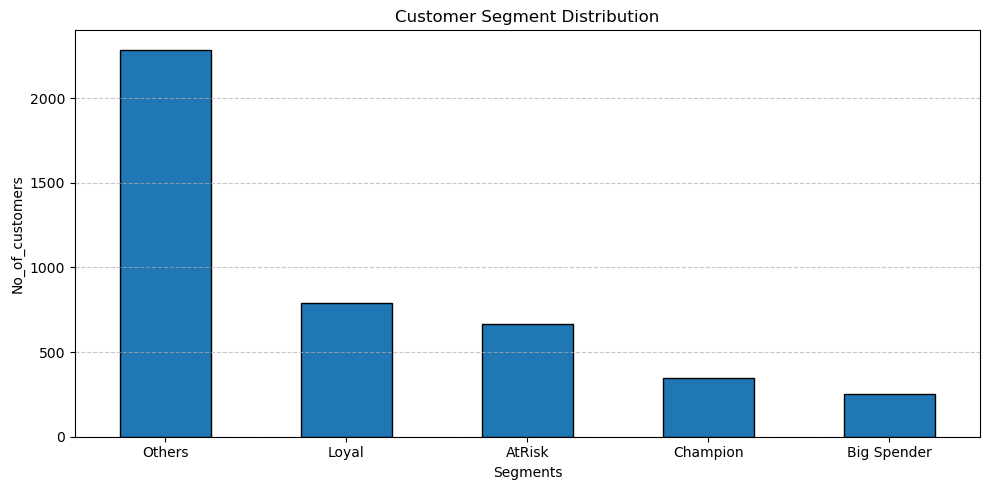

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
Segment_counts.plot(kind='bar',edgecolor ='black')
plt.title('Customer Segment Distribution')
plt.xlabel('Segments')
plt.ylabel("No_of_customers")
plt.xticks(rotation=0)
plt.tight_layout()
plt.grid(axis='y',linestyle='--',alpha=0.7)

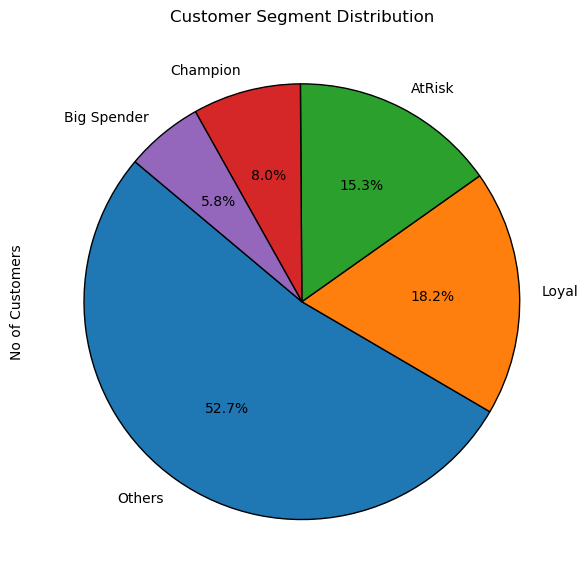

In [45]:
# Create a pie chart
segment_counts = rfm['Segment'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(segment_counts,labels=segment_counts.index, autopct='%1.1f%%',
    startangle=140,
    wedgeprops={'edgecolor': 'black'})
plt.title("Customer Segment Distribution")
plt.ylabel("No of Customers")
plt.tight_layout()